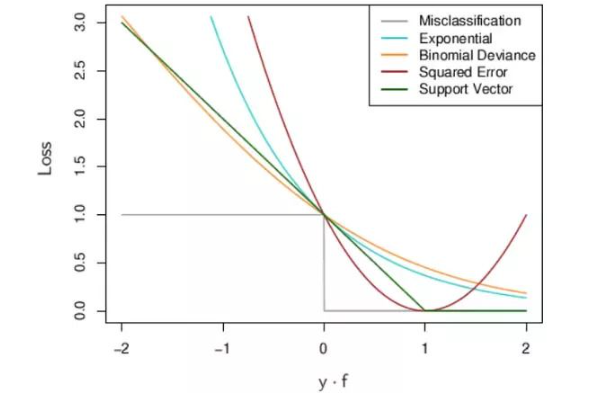

Above is for binary classification where y = 1/-1, f is raw prediction, 
class prediction is sign(f) = 1 if f>0, 0 if f=0 , -1 if f<0

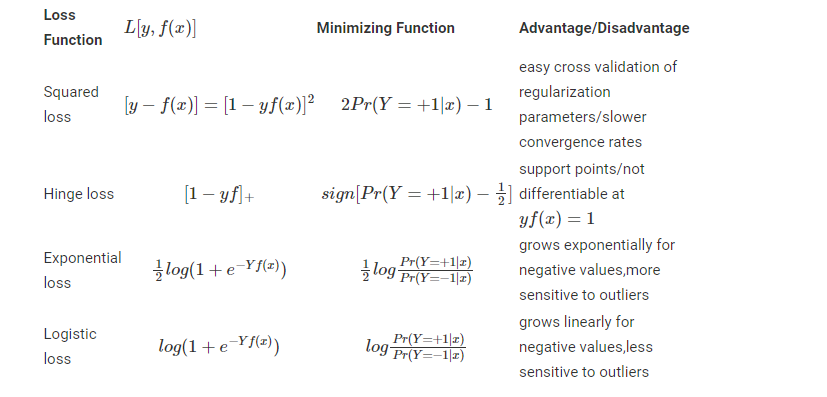

## Similarities between loss functions:



Hinge loss, Exponential loss, Logistic loss have very similar tails, giving zero penalty to points well inside their margin and linear or exponential penalty to points on the wrong side adn far away. Squared error loss gives a quadratic penalty and points inside their own margin have a strong influence on othe model as well.

Exponential loss and Logistic loss have the same asymptotes as the SVM hinge loss but are rounded in the interrior.


## Focal Loss

Introduced by FAIR in 2018 in their RetinaNet architecture. Was initially used in object detection, but can be used more broadly than that

### When do we use Focal Loss ?

In classification problems, When you have a highly imbalanced dataset, without modifying the dataset

###  What does it do ?

In traditional binary cross entropy loss,

CE = -log (p)  for Y=1
   = -log(1-p) for Y=0
   
   
where p = P(Yhat=1)
This can be plotted like so

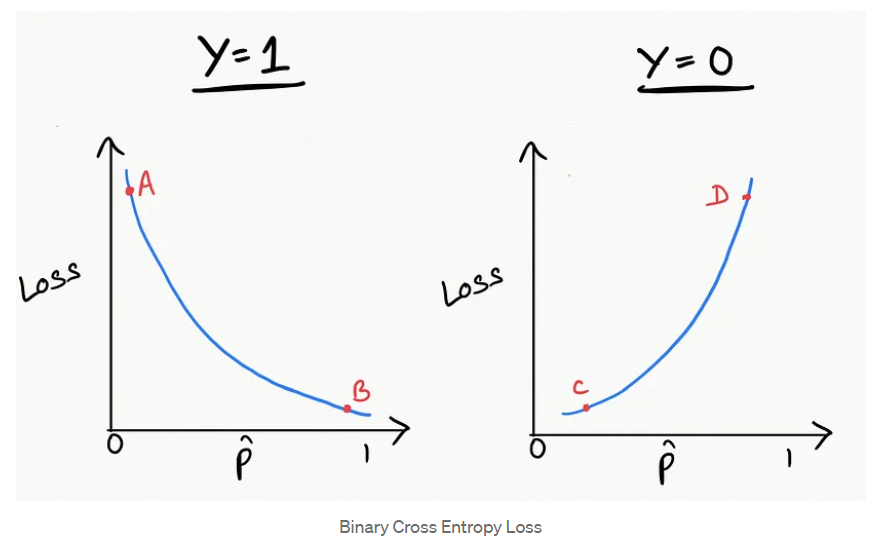

This is written more generally for a multi-class problem as

Loss for the ith sample = sum over j classes (-yjlog(pj))

where pj = P(Yhat = j)

Of course all terms vanish except the specific class which the labels belong to, leaving only 1 term per sample in a multi-class setup, a multi-label setup can have more than 1 term

Now the problem with this loss is - even at  p=0.7 or something, the first plot shows a not incosiderable loss

So even if the example is "easy", and the model predicts a high probability of 0.7, we still get a significant loss, which contributes to the training loss

Escpecially in scenarios like object detection, but also others, where you have a lot easy examples, and a few hard examples in your training data, a lot of easy examples, with a not so inconsiderable loss per easy example, adds to drowing out the hard examples, so the model does not really learn from the hard examples

So what can we do ? (Note that we are addressing two separate problems here, one where you have easy examples and hard, and one where you have a class imbalance, and this is compounded, if your class imbalance has a lot more easy examples than hard ) Ex : in object detection, the objects are lower in no compared to the background, and the background is easier to learn for the classifier compared to the object, so we have this compounding issue

Instead of the loss above, which decays as per the figure, can we make the loss decay more sharply, so even at a predicted prob. of 0.6, say, we get a near zero loss - so the model is forced to learn from the harder examples, where predicted probability for the GT class is low


This is the first part of the focal loss cost function, addressing the easy vs hard issues

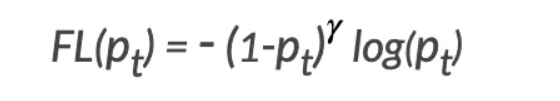

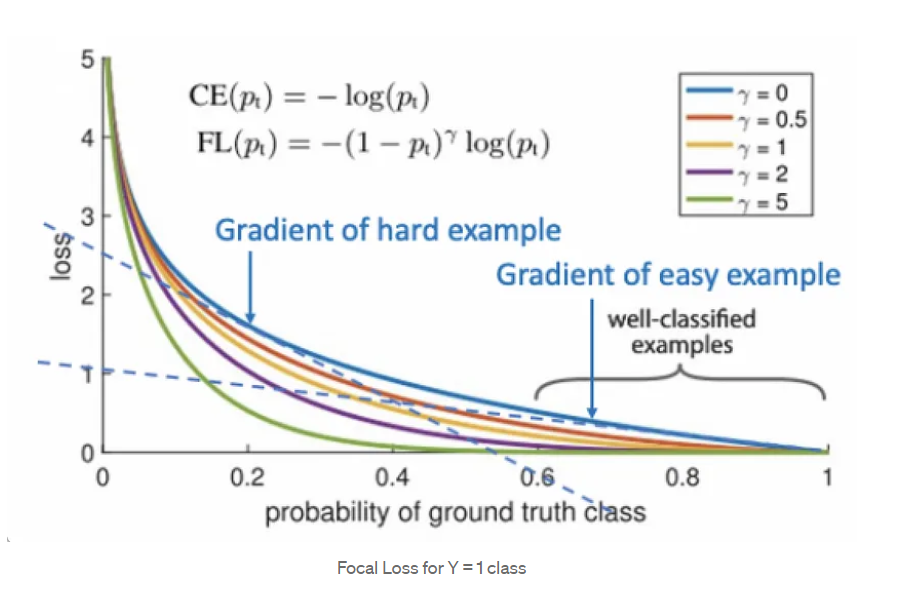

If hyperparameter gamma=0, this is the regular CE loss, the higher the gamma is the sooner the loss decays to 0 (at lower probabilities) 

Typically a gamma of 2 is recommended


This addresses the easy vs hard issue, what about the imbalance issue ?

That is addressed by a simple weighting parameter as is usual

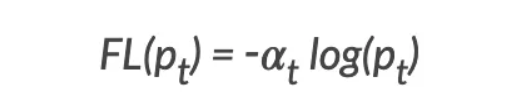



Combining both, we have the overall focal loss for the +ve class as

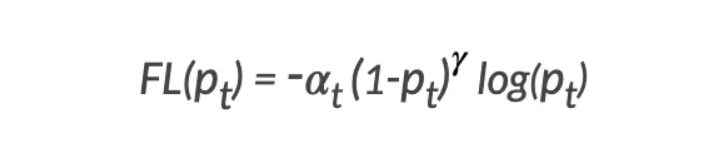

## References

1) https://yuan-du.com/post/2020-12-13-loss-functions/decision-theory/
2) https://towardsdatascience.com/what-is-loss-function-1e2605aeb904
3) https://medium.com/swlh/focal-loss-what-why-and-how-df6735f26616